# Linear Regression HW

# Data gather and feature engineering

In [28]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import plotly.express as px
import plotly.graph_objects as go
import statsmodels
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
df = automobile.data.features 
Y = automobile.data.targets 

In [3]:
# variable information
print(automobile.variables) 

                 name     role         type demographic  \
0               price  Feature   Continuous        None   
1         highway-mpg  Feature   Continuous        None   
2            city-mpg  Feature   Continuous        None   
3            peak-rpm  Feature   Continuous        None   
4          horsepower  Feature   Continuous        None   
5   compression-ratio  Feature   Continuous        None   
6              stroke  Feature   Continuous        None   
7                bore  Feature   Continuous        None   
8         fuel-system  Feature  Categorical        None   
9         engine-size  Feature   Continuous        None   
10   num-of-cylinders  Feature      Integer        None   
11        engine-type  Feature  Categorical        None   
12        curb-weight  Feature   Continuous        None   
13             height  Feature   Continuous        None   
14              width  Feature   Continuous        None   
15             length  Feature   Continuous        None 

In [4]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0


In [5]:
df.isnull().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [6]:
100* df.isnull().sum() / len(df)

price                 1.95122
highway-mpg           0.00000
city-mpg              0.00000
peak-rpm              0.97561
horsepower            0.97561
compression-ratio     0.00000
stroke                1.95122
bore                  1.95122
fuel-system           0.00000
engine-size           0.00000
num-of-cylinders      0.00000
engine-type           0.00000
curb-weight           0.00000
height                0.00000
width                 0.00000
length                0.00000
wheel-base            0.00000
engine-location       0.00000
drive-wheels          0.00000
body-style            0.00000
num-of-doors          0.97561
aspiration            0.00000
fuel-type             0.00000
make                  0.00000
normalized-losses    20.00000
dtype: float64

In [7]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [8]:
percent_nan = percent_missing(df)
percent_nan

peak-rpm              0.97561
horsepower            0.97561
num-of-doors          0.97561
price                 1.95122
stroke                1.95122
bore                  1.95122
normalized-losses    20.00000
dtype: float64

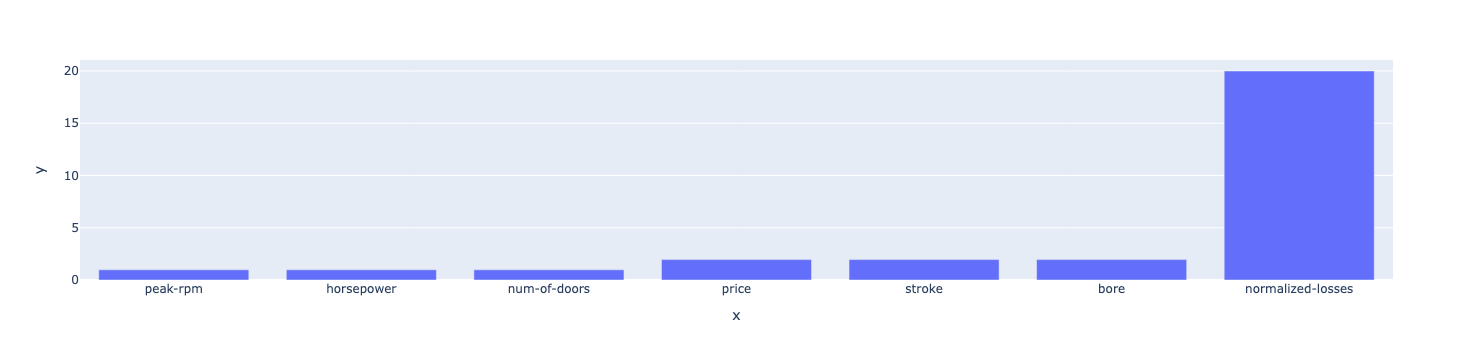

In [17]:
fig = px.bar(x=percent_nan.index , y=percent_nan)
fig.show()

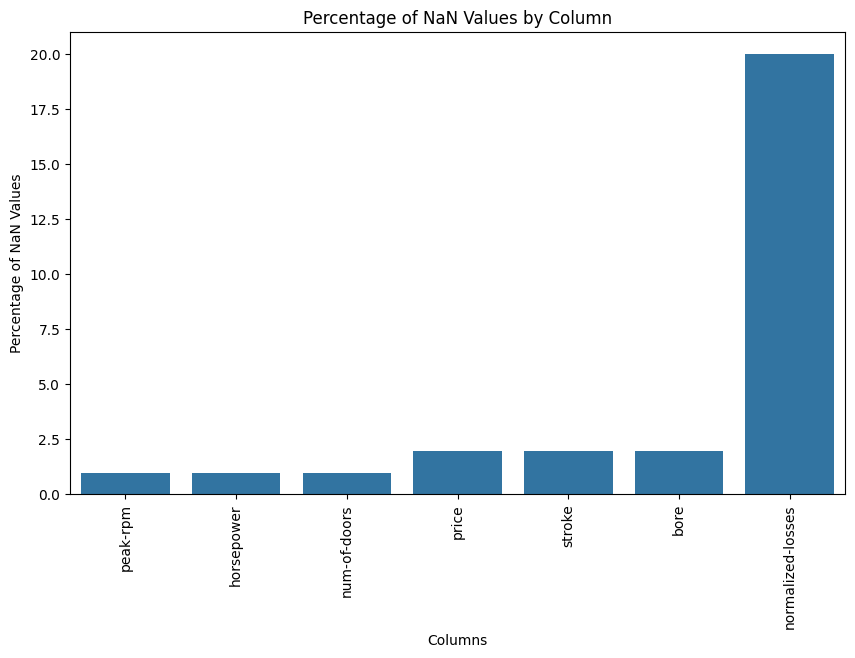

In [18]:
# Assuming 'percent_nan' is a pandas Series with index as categories and values as percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=percent_nan.index, y=percent_nan.values)
plt.title('Percentage of NaN Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=90)  # Optional: rotate x labels for better visibility if necessary
plt.show()

## Imputation of rows with nulls

In [19]:
print('Average Price:', df.price.mean())
print('Average Peak RPM:', df["peak-rpm"].mean())
print('Average Horse Power:', df["horsepower"].mean())
print('Average Stroke:', df.stroke.mean())
print('Average Bore:', df.bore.mean())
print('Average Num of doors:', df["num-of-doors"].median())
print('Average normalized-losses:', df['normalized-losses'].mean())

Average Price: 13207.129353233831
Average Peak RPM: 5125.369458128079
Average Horse Power: 104.25615763546799
Average Stroke: 3.255422885572139
Average Bore: 3.3297512437810943
Average Num of doors: 4.0
Average normalized-losses: 122.0


In [20]:
# Filling missing values for 'price' with the mean of the column
df.loc[:, 'price'] = df['price'].fillna(df['price'].mean())

# Filling missing values for 'peak-rpm' with the mean of the column
df.loc[:, 'peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())

# Filling missing values for 'horsepower' with the mean of the column
df.loc[:, 'horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# Filling missing values for 'stroke' with the mean of the column
df.loc[:, 'stroke'] = df['stroke'].fillna(df['stroke'].mean())

# Filling missing values for 'bore' with the mean of the column
df.loc[:, 'bore'] = df['bore'].fillna(df['bore'].mean())

# Filling missing values for 'num-of-doors' with the median of the column
df.loc[:, 'num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].median())

# Filling missing values for 'normalized-losses' with the mean of the column
df.loc[:, 'normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())


In [21]:
df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64

In [23]:
#Convert string categorical columns to integers

encoder = LabelEncoder()

# Apply LabelEncoder to each categorical string column
for column in df.columns:
    if df[column].dtype == 'object':  # Only apply to object type columns
        df[column] = encoder.fit_transform(df[column])

df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,122.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,122.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0


# Exploratory Data Analysis

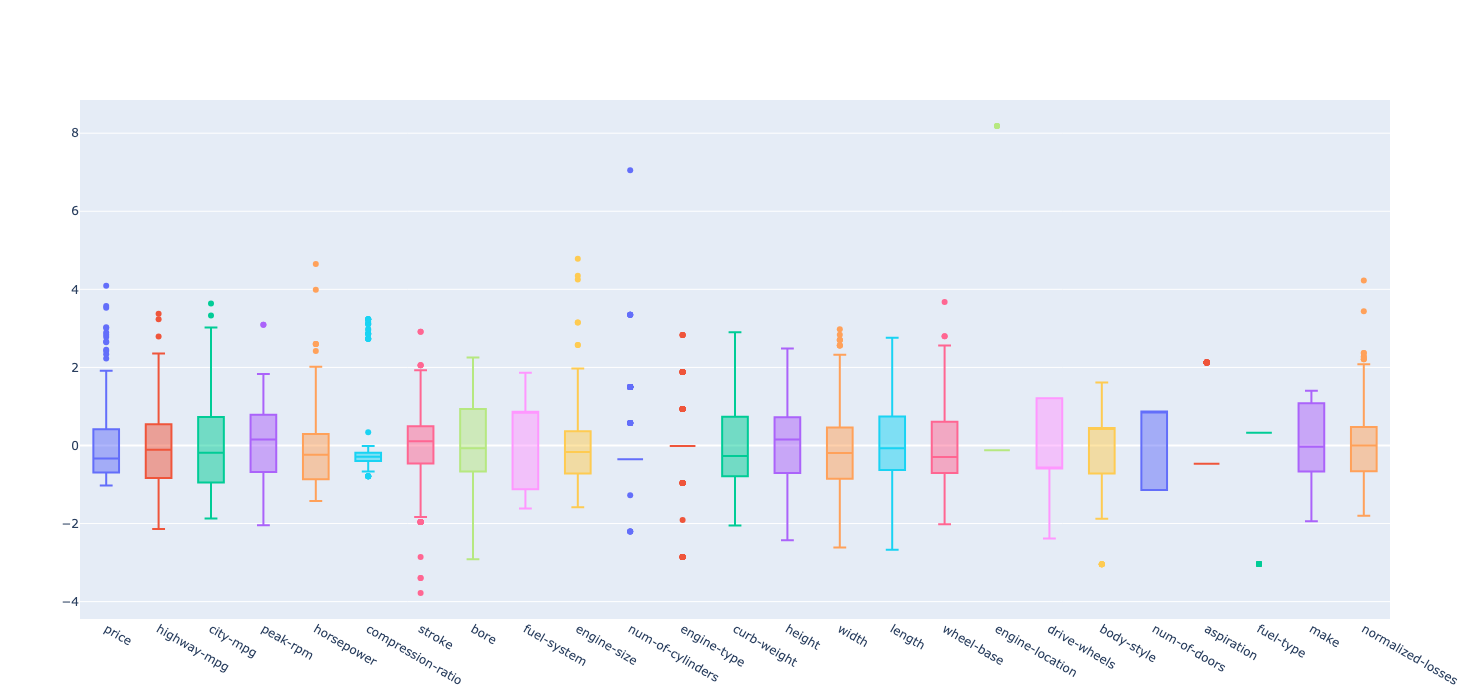

In [24]:
# check for outliers

numeric_df = df.select_dtypes(include=[np.number]) 
standard = (numeric_df-numeric_df.mean())/numeric_df.std()

# Create a box plot
fig = go.Figure()
for i in standard.columns:
    fig.add_trace(go.Box(y=standard[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

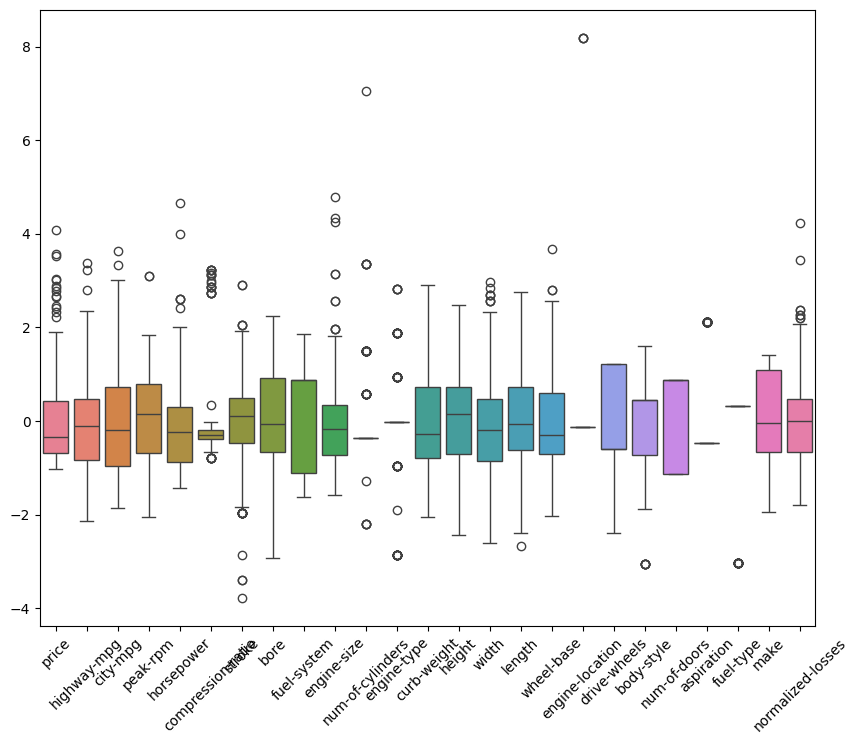

In [25]:
# Assuming 'numeric_df' is your DataFrame with numerical data
# Standardize the DataFrame
standard = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a box plot
sns_boxplot = sns.boxplot(data=standard)
sns_boxplot.set_xticklabels(sns_boxplot.get_xticklabels(), rotation=45)  # Rotate x labels for better visibility

plt.show()

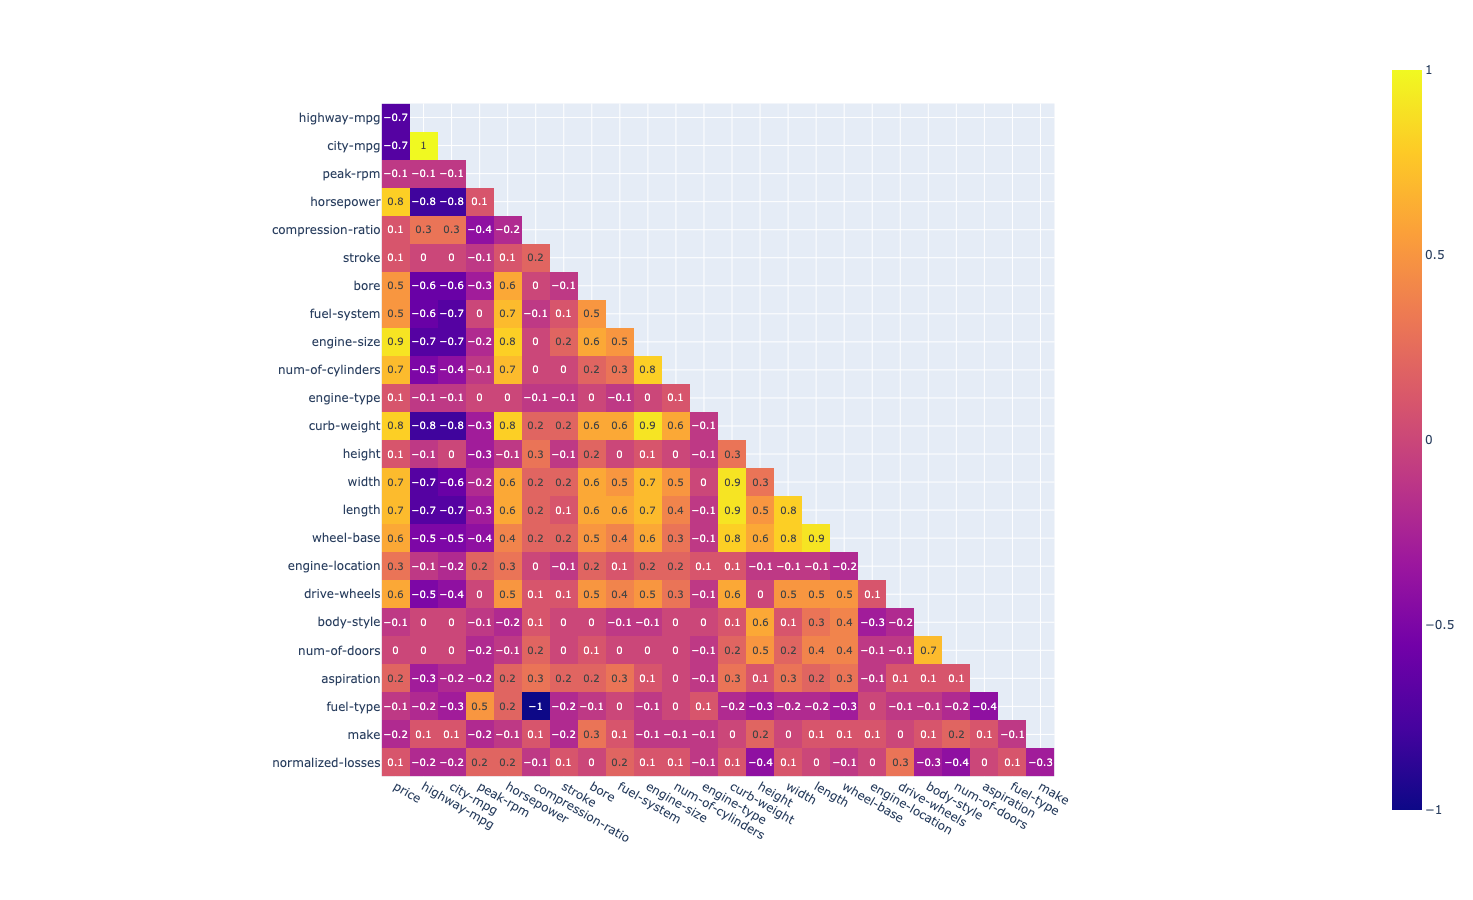

In [26]:
# check for correlation
df_corr = numeric_df.corr().round(1)  

# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Apply the mask to the correlation matrix and then drop rows and columns with all NaN values
df_corr_viz = df_corr.mask(mask)
df_corr_viz = df_corr_viz.dropna(axis=0, how='all') 
df_corr_viz = df_corr_viz.dropna(axis=1, how='all')  

# Heat Map
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height=900, width=900)
fig.show()

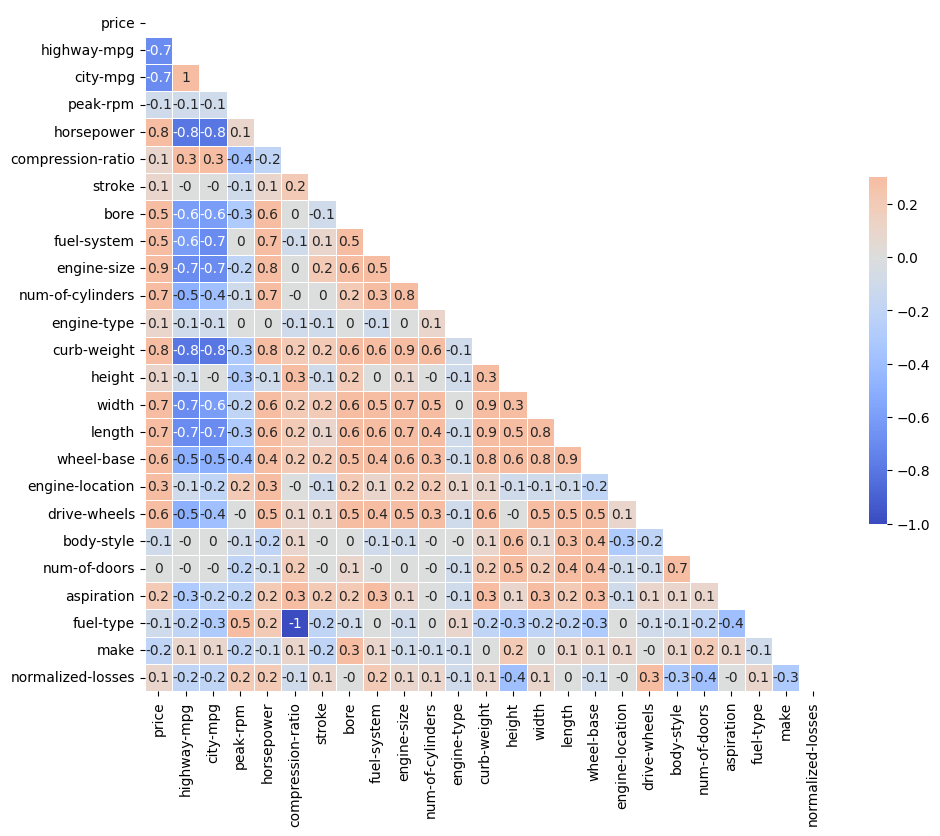

In [27]:
# Selecting numeric types
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_df.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=.3, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Focus on Price and High-mpg since they are negatively strong correlated for Simple linear regression

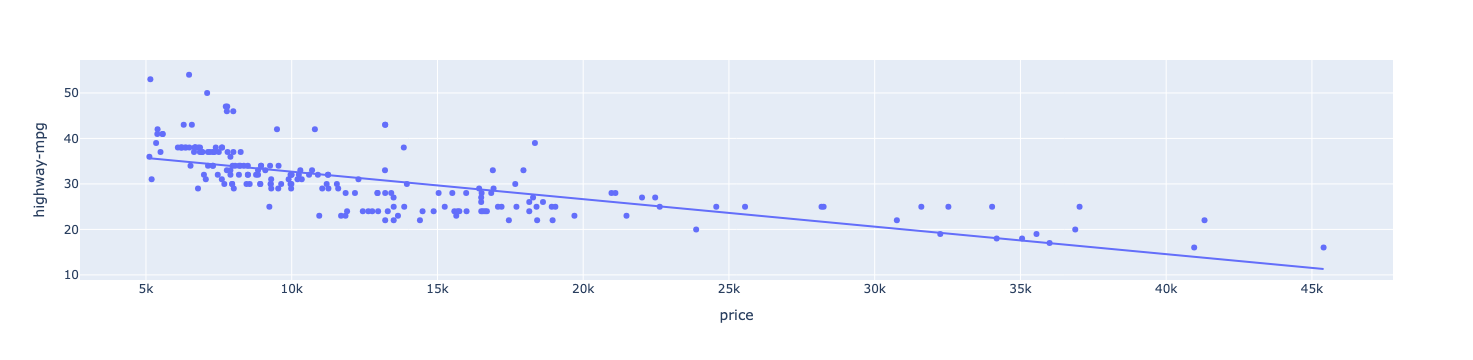

In [21]:
fig = px.scatter(df, x="price", y="highway-mpg", trendline="ols")
fig.show()

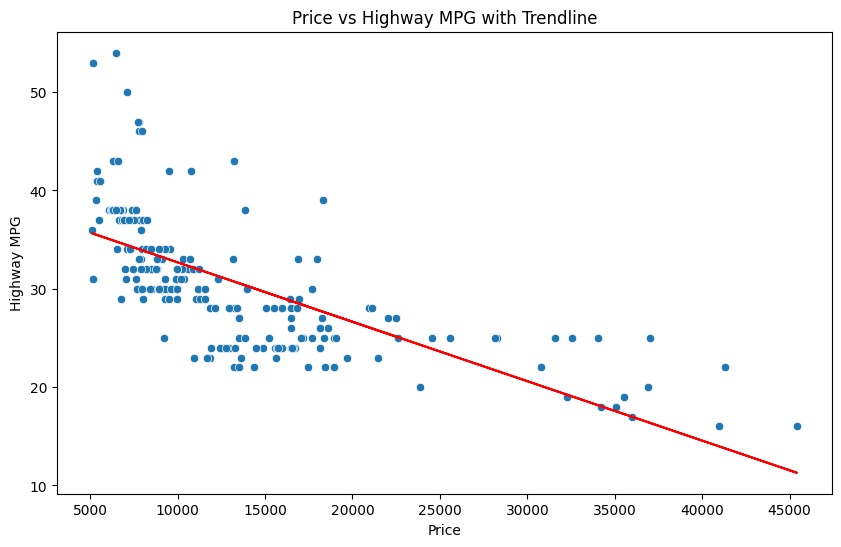

In [29]:
# Scatter plot with OLS trendline for 'price' vs 'highway-mpg'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='highway-mpg')
# Fit an OLS model
model = sm.OLS(df['highway-mpg'], sm.add_constant(df['price'])).fit()
# Plot the trendline
plt.plot(df['price'], model.predict(sm.add_constant(df['price'])), color='red')
plt.title('Price vs Highway MPG with Trendline')
plt.xlabel('Price')
plt.ylabel('Highway MPG')
plt.show()

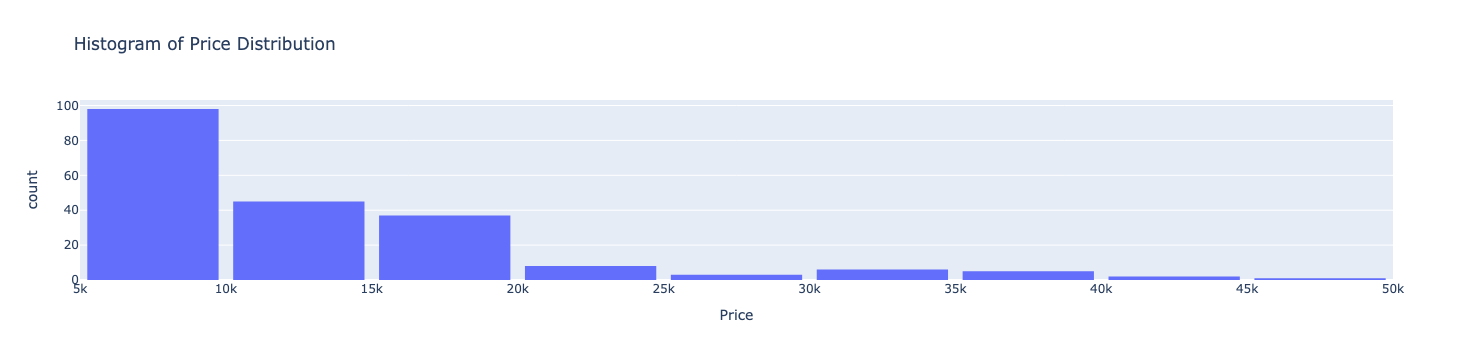

In [22]:
# histogram for the 'price' variable
fig = px.histogram(df, x='price', nbins=20, title='Histogram of Price Distribution', labels={'price': 'Price'})
fig.update_layout(bargap=0.1)
fig.show()

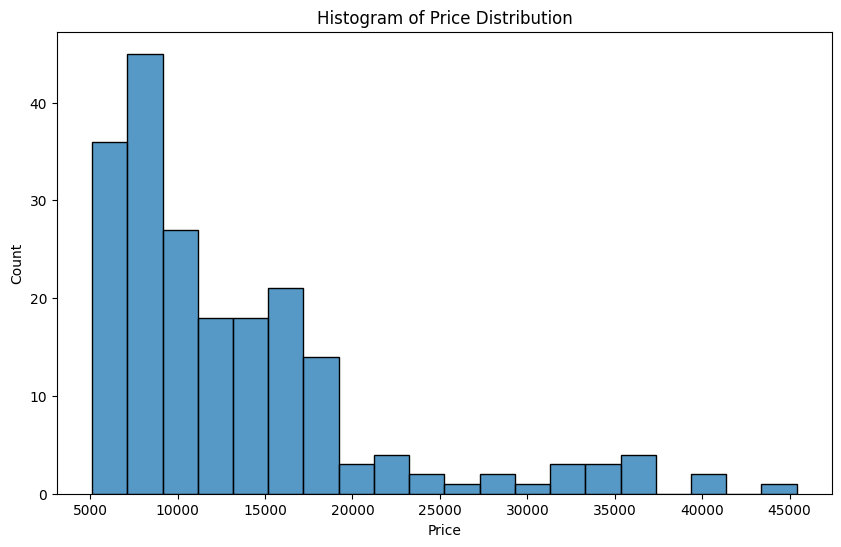

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=False)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

### Normalize the price values to reduce the spread and outliers

In [33]:
df['log_price'] = np.log(df['price'])
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,log_price
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,88.6,0,2,0,2.0,0,1,0,122.0,9.510075
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,88.6,0,2,0,2.0,0,1,0,122.0,9.711116
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,94.5,0,2,2,2.0,0,1,0,122.0,9.711116
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,99.8,0,1,3,4.0,0,1,1,164.0,9.543235
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,99.4,0,0,3,4.0,0,1,1,164.0,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,5,141,...,109.1,0,2,3,4.0,0,1,21,95.0,9.731809
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,5,141,...,109.1,0,2,3,4.0,1,1,21,95.0,9.854560
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,5,173,...,109.1,0,2,3,4.0,0,1,21,95.0,9.975110
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,3,145,...,109.1,0,2,3,4.0,1,0,21,95.0,10.019936


### Normalize price

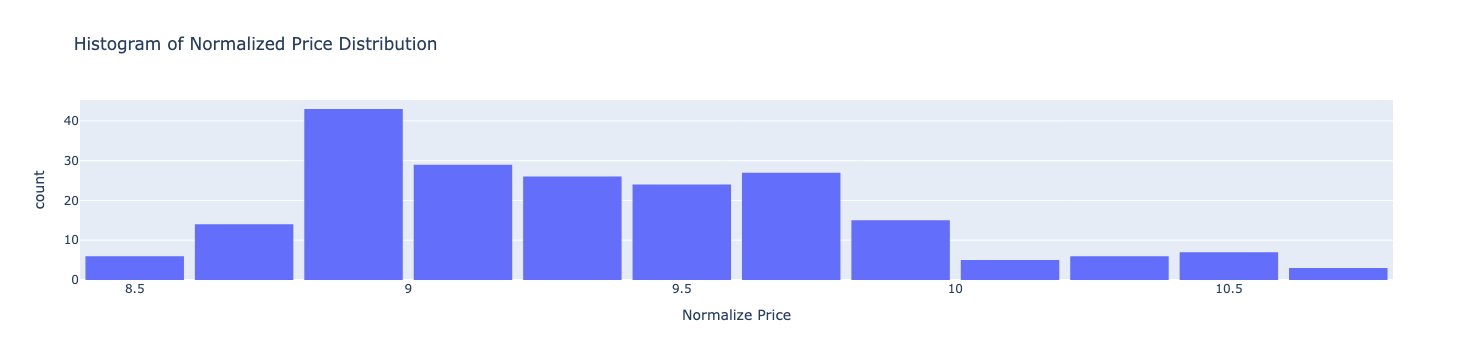

In [34]:
# histogram for the 'price' variable
fig = px.histogram(df, x='log_price', nbins=20, title='Histogram of Normalized Price Distribution', labels={'log_price': 'Normalize Price'})
fig.update_layout(bargap=0.1)
fig.show()

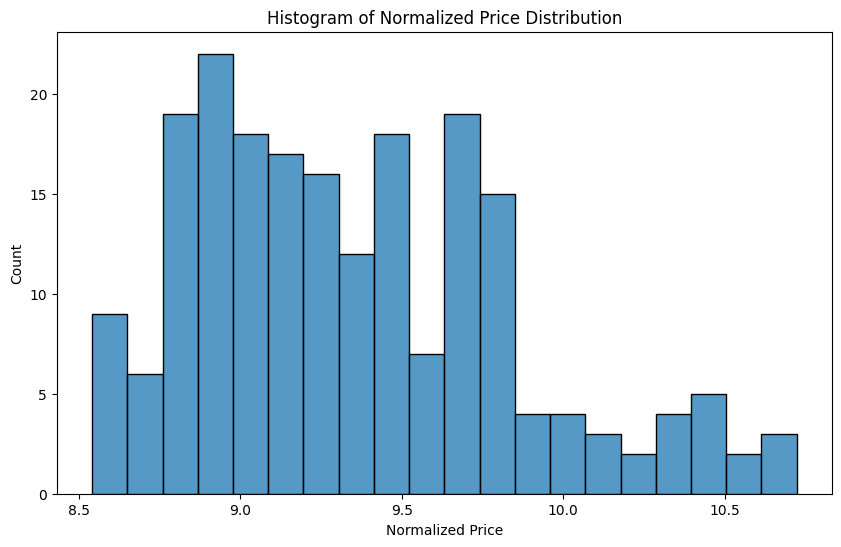

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=20, kde=False)
plt.title('Histogram of Normalized Price Distribution')
plt.xlabel('Normalized Price')
plt.ylabel('Count')
plt.show()

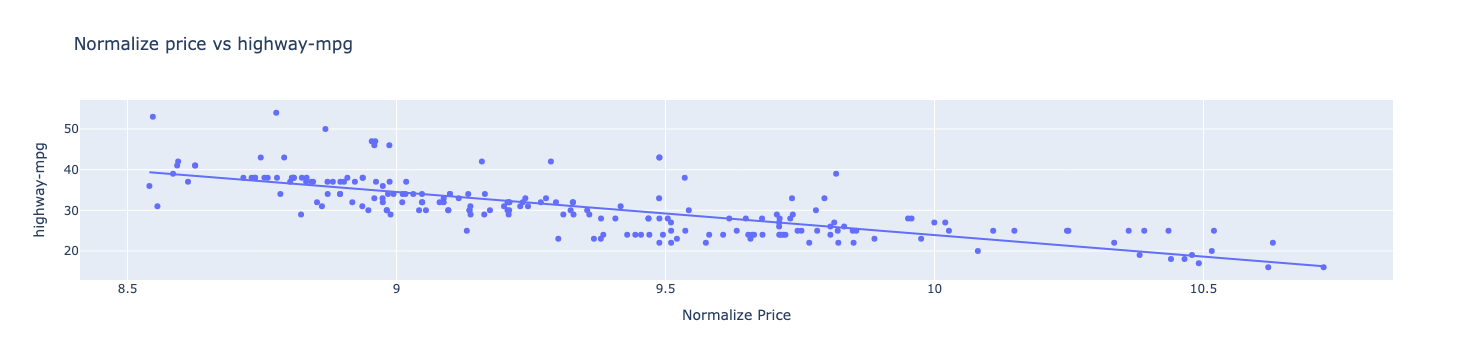

In [25]:
fig = px.scatter(df, x="log_price", y="highway-mpg", trendline="ols", title="Normalize price vs highway-mpg", labels={'log_price': 'Normalize Price'})
fig.show()

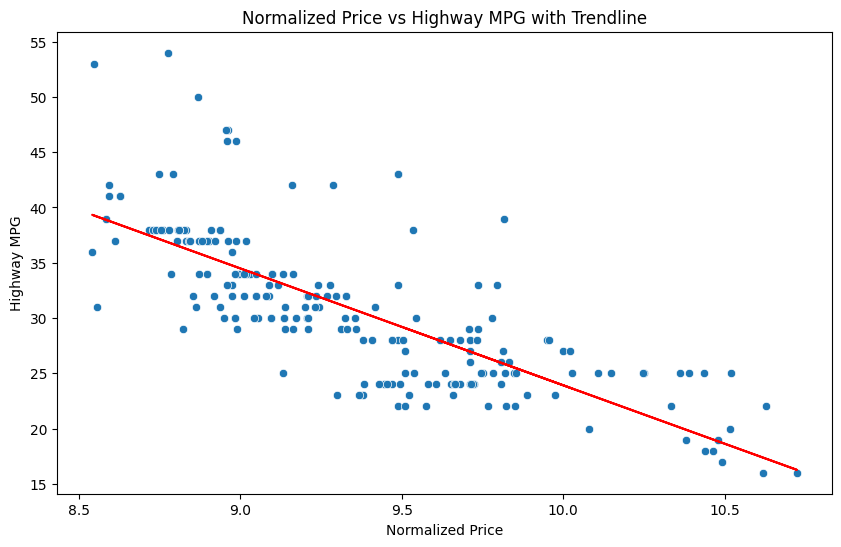

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_price', y='highway-mpg')
# Fit an OLS model for normalized price
model = sm.OLS(df['highway-mpg'], sm.add_constant(df['log_price'])).fit()
# Plot the trendline
plt.plot(df['log_price'], model.predict(sm.add_constant(df['log_price'])), color='red')
plt.title('Normalized Price vs Highway MPG with Trendline')
plt.xlabel('Normalized Price')
plt.ylabel('Highway MPG')
plt.show()

# Start Simple Regression tasks

In [41]:
X = df['log_price']
y = df['highway-mpg']

# Returns highest order coef first!
slope, intercept=np.polyfit(X,y,1)

In [42]:
slope

-10.568888074202835

In [43]:
intercept

129.60007543590967

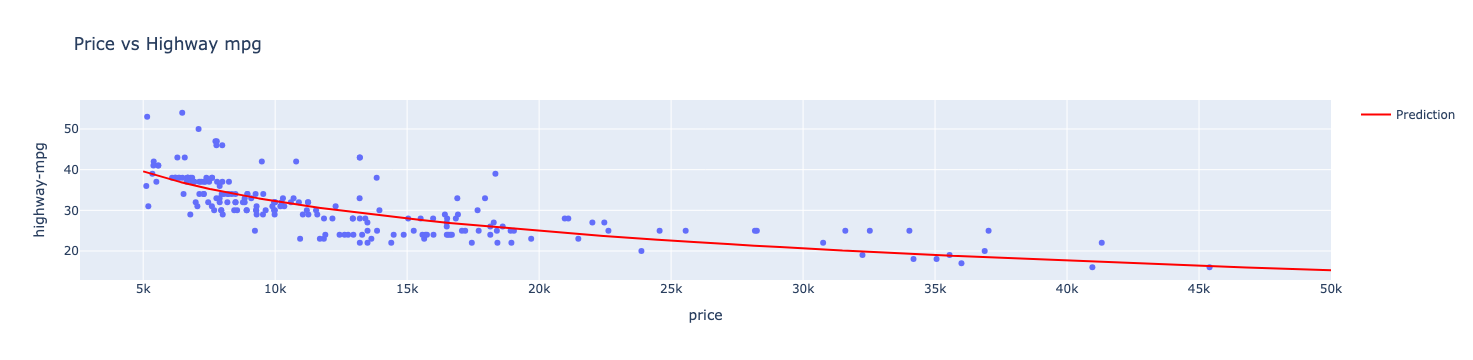

In [44]:
# Generate potential prices from $5,000 to $50,000
potential_price = np.linspace(5000, 50000, 5000)

# Convert potential_price to log_price
log_price = np.log(potential_price)

# Calculate the predicted mpg using the regression model fitted on log_price
predicted_mpg = slope * log_price + intercept

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='price', y='highway-mpg', title='Price vs Highway mpg')

# Add a line plot using Plotly Graph Objects
fig.add_trace(
    go.Scatter(x=potential_price, y=predicted_mpg, mode='lines', name='Prediction', line=dict(color='red'))
)

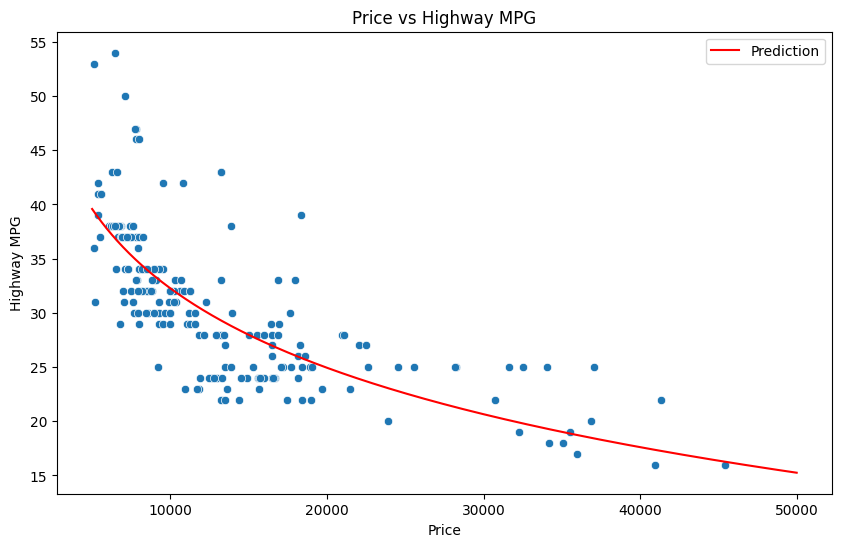

In [45]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='highway-mpg')
plt.plot(potential_price, predicted_mpg, color='red', label='Prediction')  # Adding the prediction line
plt.title('Price vs Highway MPG')
plt.xlabel('Price')
plt.ylabel('Highway MPG')
plt.legend()
plt.show()

### if a car price is 30k, what is its highway-mpg?

In [46]:
prediction= slope * np.log(31253) + intercept
print("Price at 30k, mpg = " + str(prediction))

Price at 30k, mpg = 20.21345094769751


### explore higher order to measure performance

In [47]:
coefficients = np.polyfit(X, y, 4)

predicted_mpg_2 = np.polyval(coefficients, log_price)

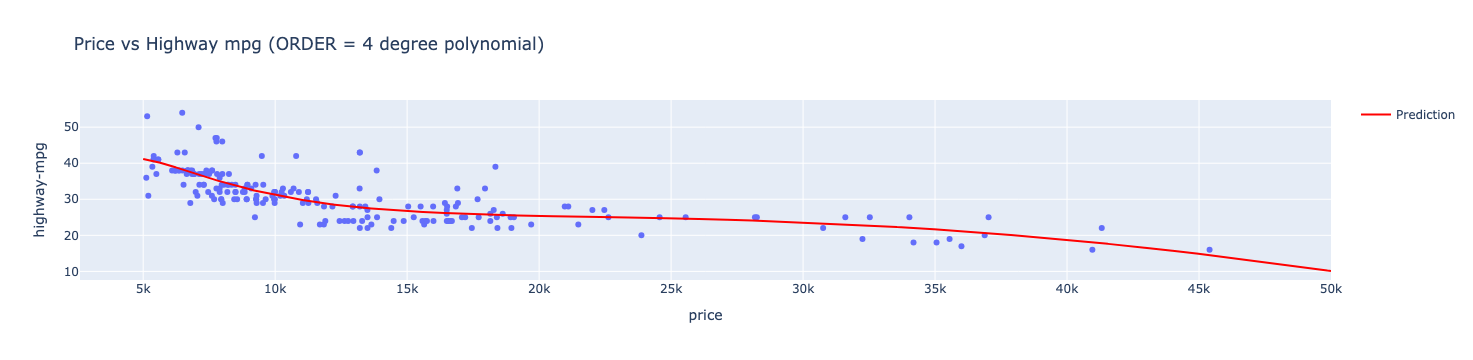

In [48]:
# Calculate the predicted mpg using the regression model fitted on log_price
predicted_mpg = slope * log_price + intercept

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='price', y='highway-mpg', title='Price vs Highway mpg (ORDER = 4 degree polynomial)')

# Add a line plot using Plotly Graph Objects
fig.add_trace(
    go.Scatter(x=potential_price, y=predicted_mpg_2, mode='lines', name='Prediction', line=dict(color='red'))
)

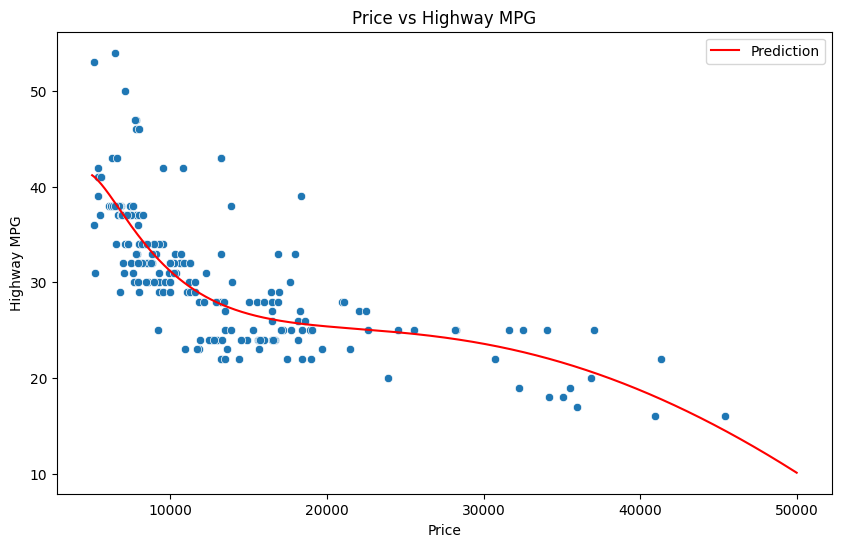

In [49]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='highway-mpg')
plt.plot(potential_price, predicted_mpg_2, color='red', label='Prediction')  # Adding the prediction line
plt.title('Price vs Highway MPG')
plt.xlabel('Price')
plt.ylabel('Highway MPG')
plt.legend()
plt.show()

### if a car price is 30k, what is its highway-mpg?

In [50]:
prediction_2 = np.polyval(coefficients, np.log(31253))
print("Price at 30k, mpg = " + str(prediction_2))

Price at 30k, mpg = 23.18117707475176


## Linear Regression Model, target will be Target = Price 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy as sp
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error,mean_squared_error



# Excluding the first column from X and using it for y
X = df.iloc[:-1, 1:]  # All rows except the last one, excluding the first column
X = X.iloc[:, :-1]  

X = pd.concat([X, Y.iloc[:-1,:]], axis=1)  # Concatenating along columns

y = df.iloc[:-1, 0]  # All rows except the last one, and only the first column

y_log = np.log(y + 1)  # Applying log normalization, adding 1 to avoid log(0)

unseen_X = df.iloc[-1:, 1:]   # only the last row, excluding the first column
unseen_X  = unseen_X .iloc[:, :-1] 
unseen_X = pd.concat([unseen_X , Y.iloc[-1:,:]], axis=1)  # Concatenating along columns

unseen_y = df.iloc[-1, 0]   # only the last row, and only the first column

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=0)

In [54]:
X.head()

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,4,...,88.6,0,2,0,2.0,0,1,0,122.0,3
1,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,4,...,88.6,0,2,0,2.0,0,1,0,122.0,3
2,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,6,...,94.5,0,2,2,2.0,0,1,0,122.0,1
3,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,4,...,99.8,0,1,3,4.0,0,1,1,164.0,2
4,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,5,...,99.4,0,0,3,4.0,0,1,1,164.0,2


In [55]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [56]:
y_log.head()

0    9.510149
1    9.711176
2    9.711176
3    9.543306
4    9.767152
Name: price, dtype: float64

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [58]:
test_predictions = model.predict(X_test)
test_predictions

array([ 8.3955631 ,  8.79312378,  8.83001335,  9.04406057,  9.74113774,
        8.73112406,  9.40423535,  9.51697541,  9.52639088,  8.8441775 ,
        9.15602978,  9.1165973 ,  9.1986575 ,  8.71777978,  9.03233253,
        9.83155581, 10.36681891,  9.17577721,  9.88513335,  9.39334328,
        8.6773238 ,  8.94891727,  9.30443237,  9.53665979,  9.08323627,
        8.95832123,  9.23071425,  8.91051437,  8.89500446,  8.86839976,
        9.77059367,  9.23063824, 10.06888402, 10.52959254,  9.2048621 ,
        8.79299104, 10.33694183,  8.797025  ,  9.57897326,  8.82775533,
        9.69998872])

In [59]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [60]:
MAE

0.19066126779847836

In [61]:
MSE

0.08156668768286487

In [62]:
RMSE

0.2855988229717778

### Plotting Residuals

In [63]:
test_predictions = model.predict(X_test)

test_res = y_test.squeeze() - test_predictions.squeeze()

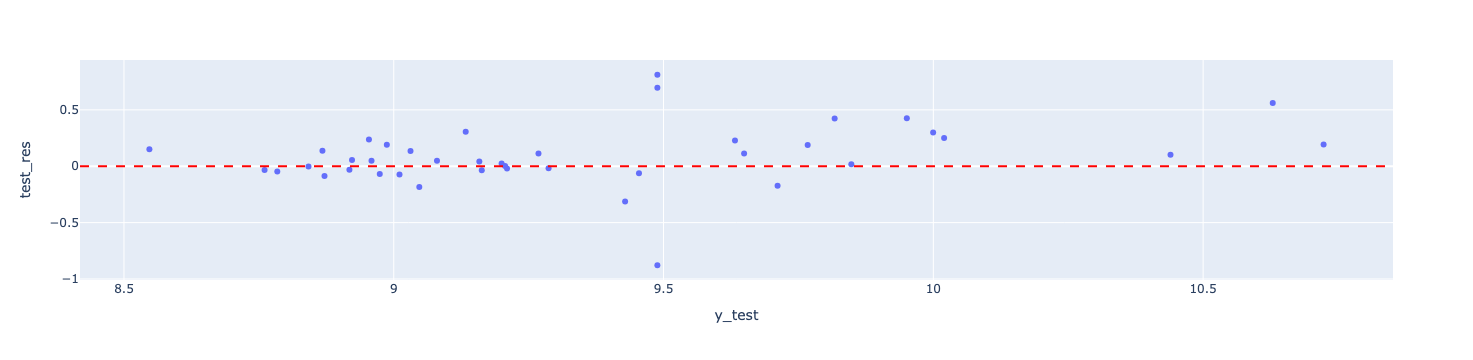

In [65]:
fig = px.scatter(x=y_test.squeeze(), y=test_res.squeeze(), labels={'x': 'y_test', 'y': 'test_res'})
fig.add_hline(y=0, line_dash="dash", line_color="red")

fig.show()

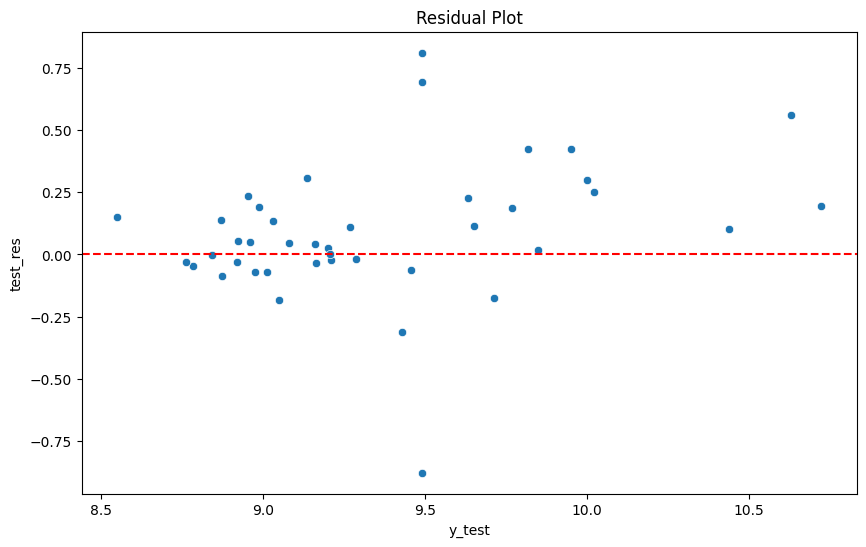

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.squeeze(), y=test_res.squeeze())
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('y_test')
plt.ylabel('test_res')
plt.title('Residual Plot')
plt.show()

In [67]:
len(test_res)


41

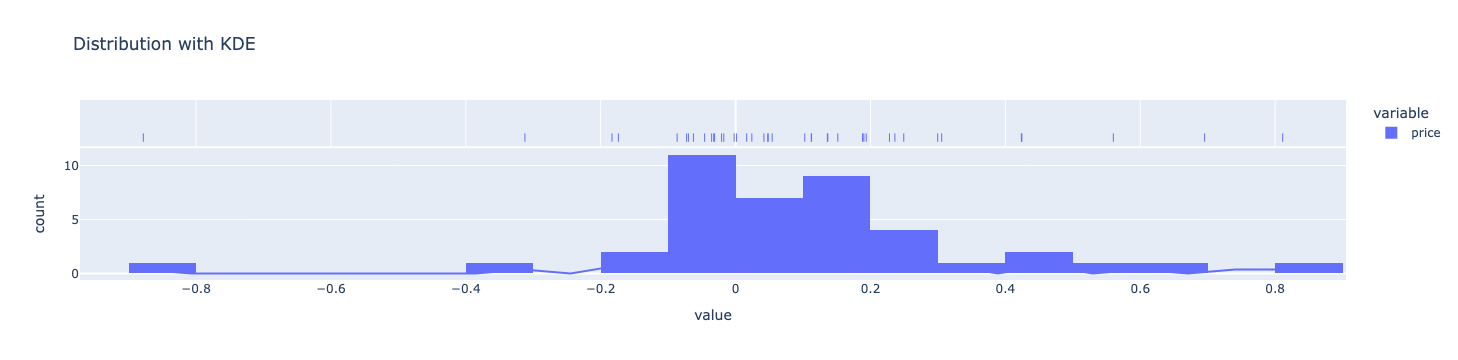

In [68]:
# Assuming 'test_res' is your data array or series
fig = px.histogram(test_res.squeeze(), nbins=25, marginal='rug', title='Distribution with KDE')

# Overlaying KDE by adding a trace
fig.add_traces(px.line(x=np.linspace(min(test_res.squeeze()), max(test_res.squeeze()), 25),
                       y=np.histogram(test_res.squeeze(), bins=25, density=True)[0]).data)

fig.show()

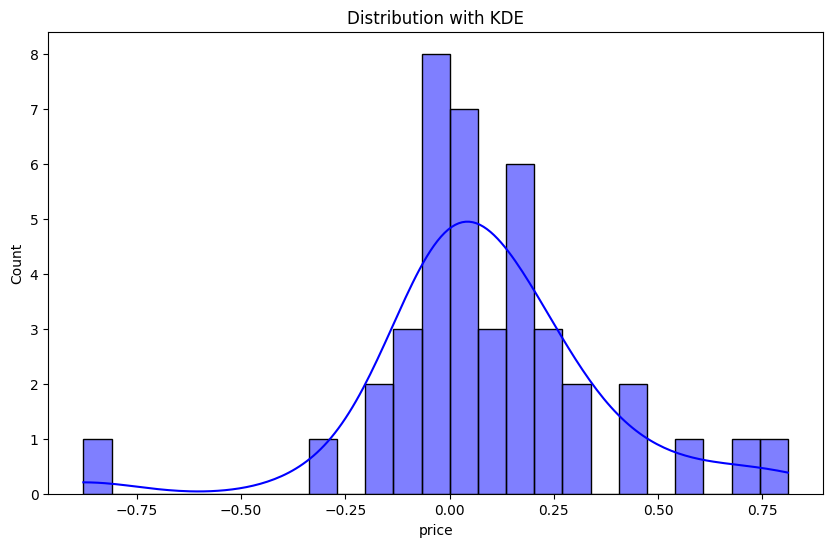

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(test_res.squeeze(), bins=25, kde=True, color='blue')
plt.title('Distribution with KDE')
plt.show()

# Retraining Model

In [70]:
final_model = LinearRegression()


In [71]:
final_model.fit(X,y_log)


LinearRegression()

In [72]:
y_hat = final_model.predict(X)
y_hat_original = np.exp(y_hat) - 1  # Reversing the log transformation


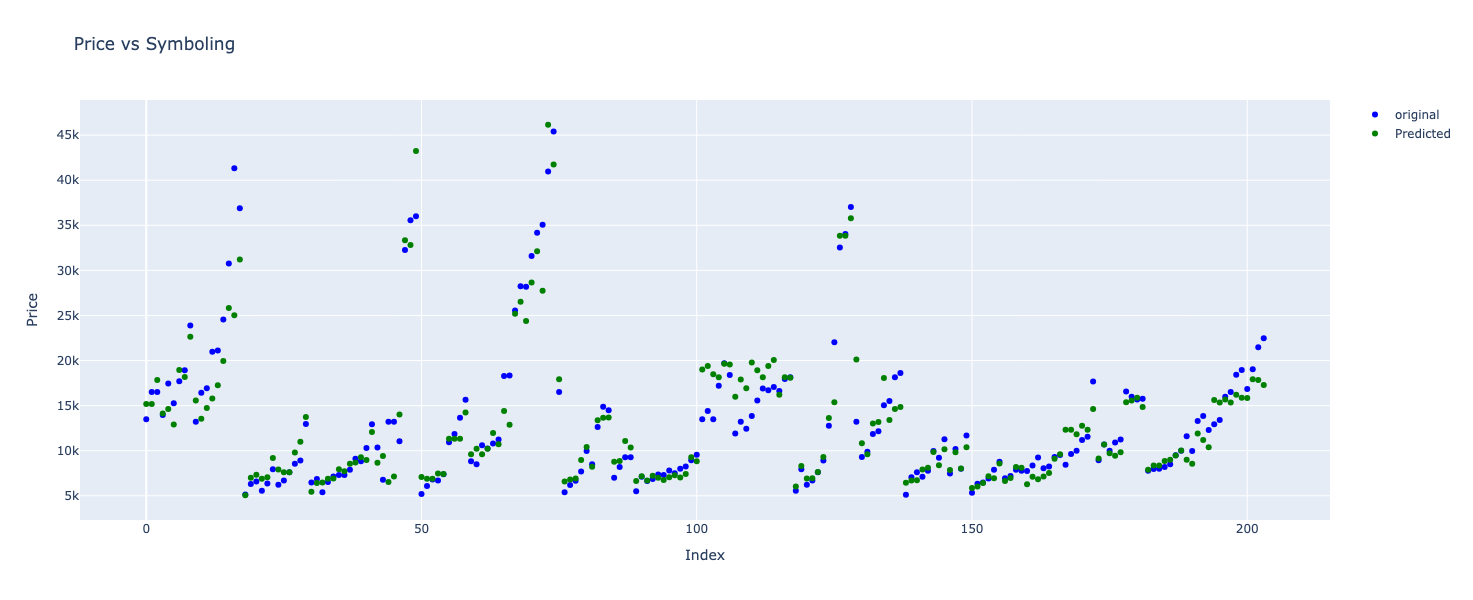

In [73]:
actual_scatter = go.Scatter(
    x=X.index, 
    y=y.squeeze(), 
    mode='markers', 
    name='original',
    marker=dict(color='blue')
)

# Create a scatter plot for the predicted data points
predicted_scatter = go.Scatter(
    x=X.index, 
    y=y_hat_original.squeeze(), 
    mode='markers', 
    name='Predicted ',
    marker=dict(color='green')
)

# Create a figure and add traces
fig = go.Figure()
fig.add_trace(actual_scatter)
fig.add_trace(predicted_scatter)

# Update the layout
fig.update_layout(
    title="Price vs Symboling",
    xaxis_title="Index",
    yaxis_title="Price",
    width=1000,
    height=600
)

fig.show()

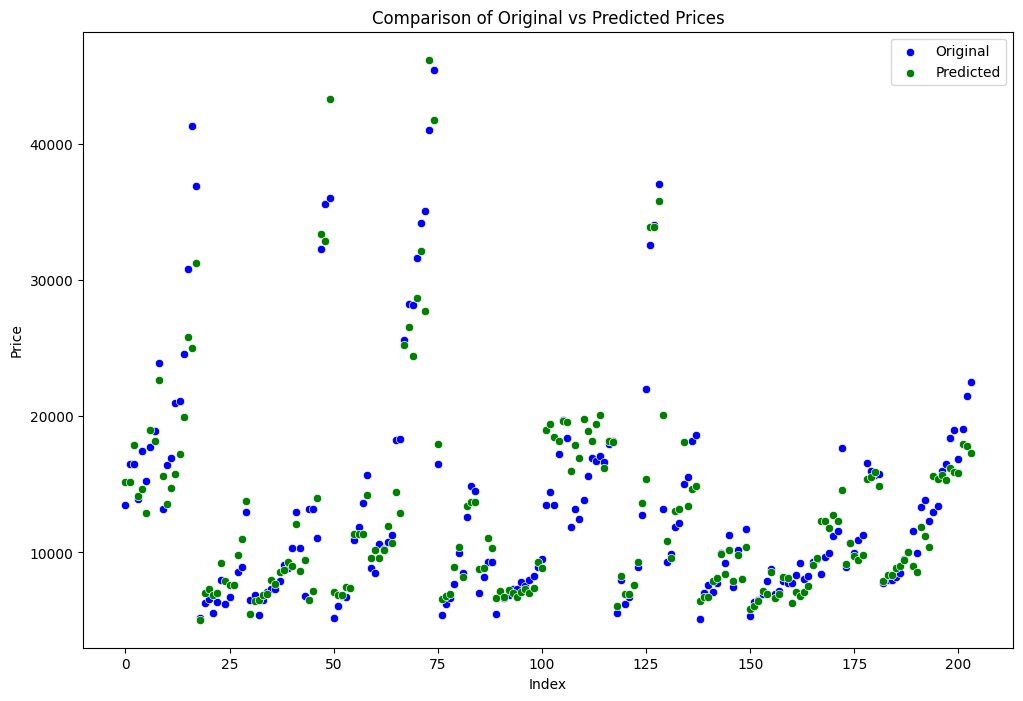

In [74]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X.index, y=y.squeeze(), color='blue', label='Original')
sns.scatterplot(x=X.index, y=y_hat_original.squeeze(), color='green', label='Predicted')
plt.title('Comparison of Original vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

### Coefficient

In [75]:
final_model.coef_


array([-3.79711709e-03, -2.45674433e-03,  3.05072112e-05,  1.09190072e-03,
        6.62189802e-02, -1.56982194e-01, -1.59592464e-01,  3.60046048e-02,
        5.18966044e-03, -9.44617877e-02,  2.03637841e-02,  2.51422549e-04,
        1.62934239e-02,  1.85913522e-02,  4.13091514e-03, -1.19467664e-03,
        6.12181483e-01,  6.42616835e-02, -4.43107109e-02,  3.76807525e-02,
        8.61792056e-02,  7.72422388e-01, -1.39606462e-02,  6.91081084e-04,
       -4.92658836e-03])

In [76]:
coeff_df = pd.DataFrame(final_model.coef_.T, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
highway-mpg,-0.003797
city-mpg,-0.002457
peak-rpm,0.000031
horsepower,0.001092
compression-ratio,0.066219
stroke,-0.156982
bore,-0.159592
fuel-system,0.036005
engine-size,0.005190
num-of-cylinders,-0.094462


In [77]:
print("Prediction of final Model = " + str(np.exp(final_model.predict(unseen_X)) - 1))

Prediction of final Model = [18134.15484441]


In [78]:
print("Original price = " + str(unseen_y))

Original price = 22625.0
